In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('customer_churn.csv')

In [3]:
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
ds['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
ds.shape

(7043, 21)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

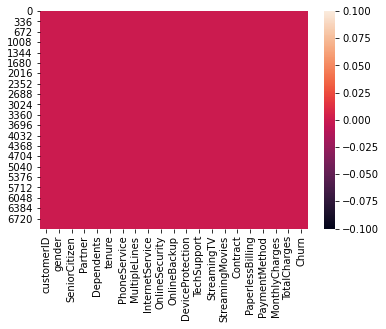

In [9]:
sns.heatmap(ds.isnull())

In [10]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#as we can see that there are many columns in but these are in object type so thats why first we change into into integer

In [12]:
ds.drop('customerID',axis=1,inplace=True)

In [13]:
ds.drop('TotalCharges',axis=1,inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
ds['gender']=le.fit_transform(ds['gender'])

In [16]:
ds['SeniorCitizen']=le.fit_transform(ds['SeniorCitizen'])

In [17]:
ds['Partner']=le.fit_transform(ds['Partner'])

In [18]:
ds['Dependents']=le.fit_transform(ds['Dependents'])

In [19]:
ds['PhoneService']=le.fit_transform(ds['PhoneService'])

In [20]:
ds['MultipleLines']=le.fit_transform(ds['MultipleLines'])

In [21]:
ds['InternetService']=le.fit_transform(ds['InternetService'])

In [22]:
ds['OnlineSecurity']=le.fit_transform(ds['OnlineSecurity'])

In [23]:
ds['DeviceProtection']=le.fit_transform(ds['DeviceProtection'])

In [24]:
ds['TechSupport']=le.fit_transform(ds['TechSupport'])

In [25]:
ds['StreamingTV']=le.fit_transform(ds['StreamingTV'])

In [26]:
ds['Contract']=le.fit_transform(ds['Contract'])

In [27]:
ds['PaperlessBilling']=le.fit_transform(ds['PaperlessBilling'])

In [28]:
ds['PaymentMethod']=le.fit_transform(ds['PaymentMethod'])

In [29]:
ds['Churn']=le.fit_transform(ds['Churn'])

In [30]:
ds['OnlineBackup']=le.fit_transform(ds['OnlineBackup'])

In [31]:
ds['StreamingMovies']=le.fit_transform(ds['StreamingMovies'])

In [32]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [33]:
#let see some analysis

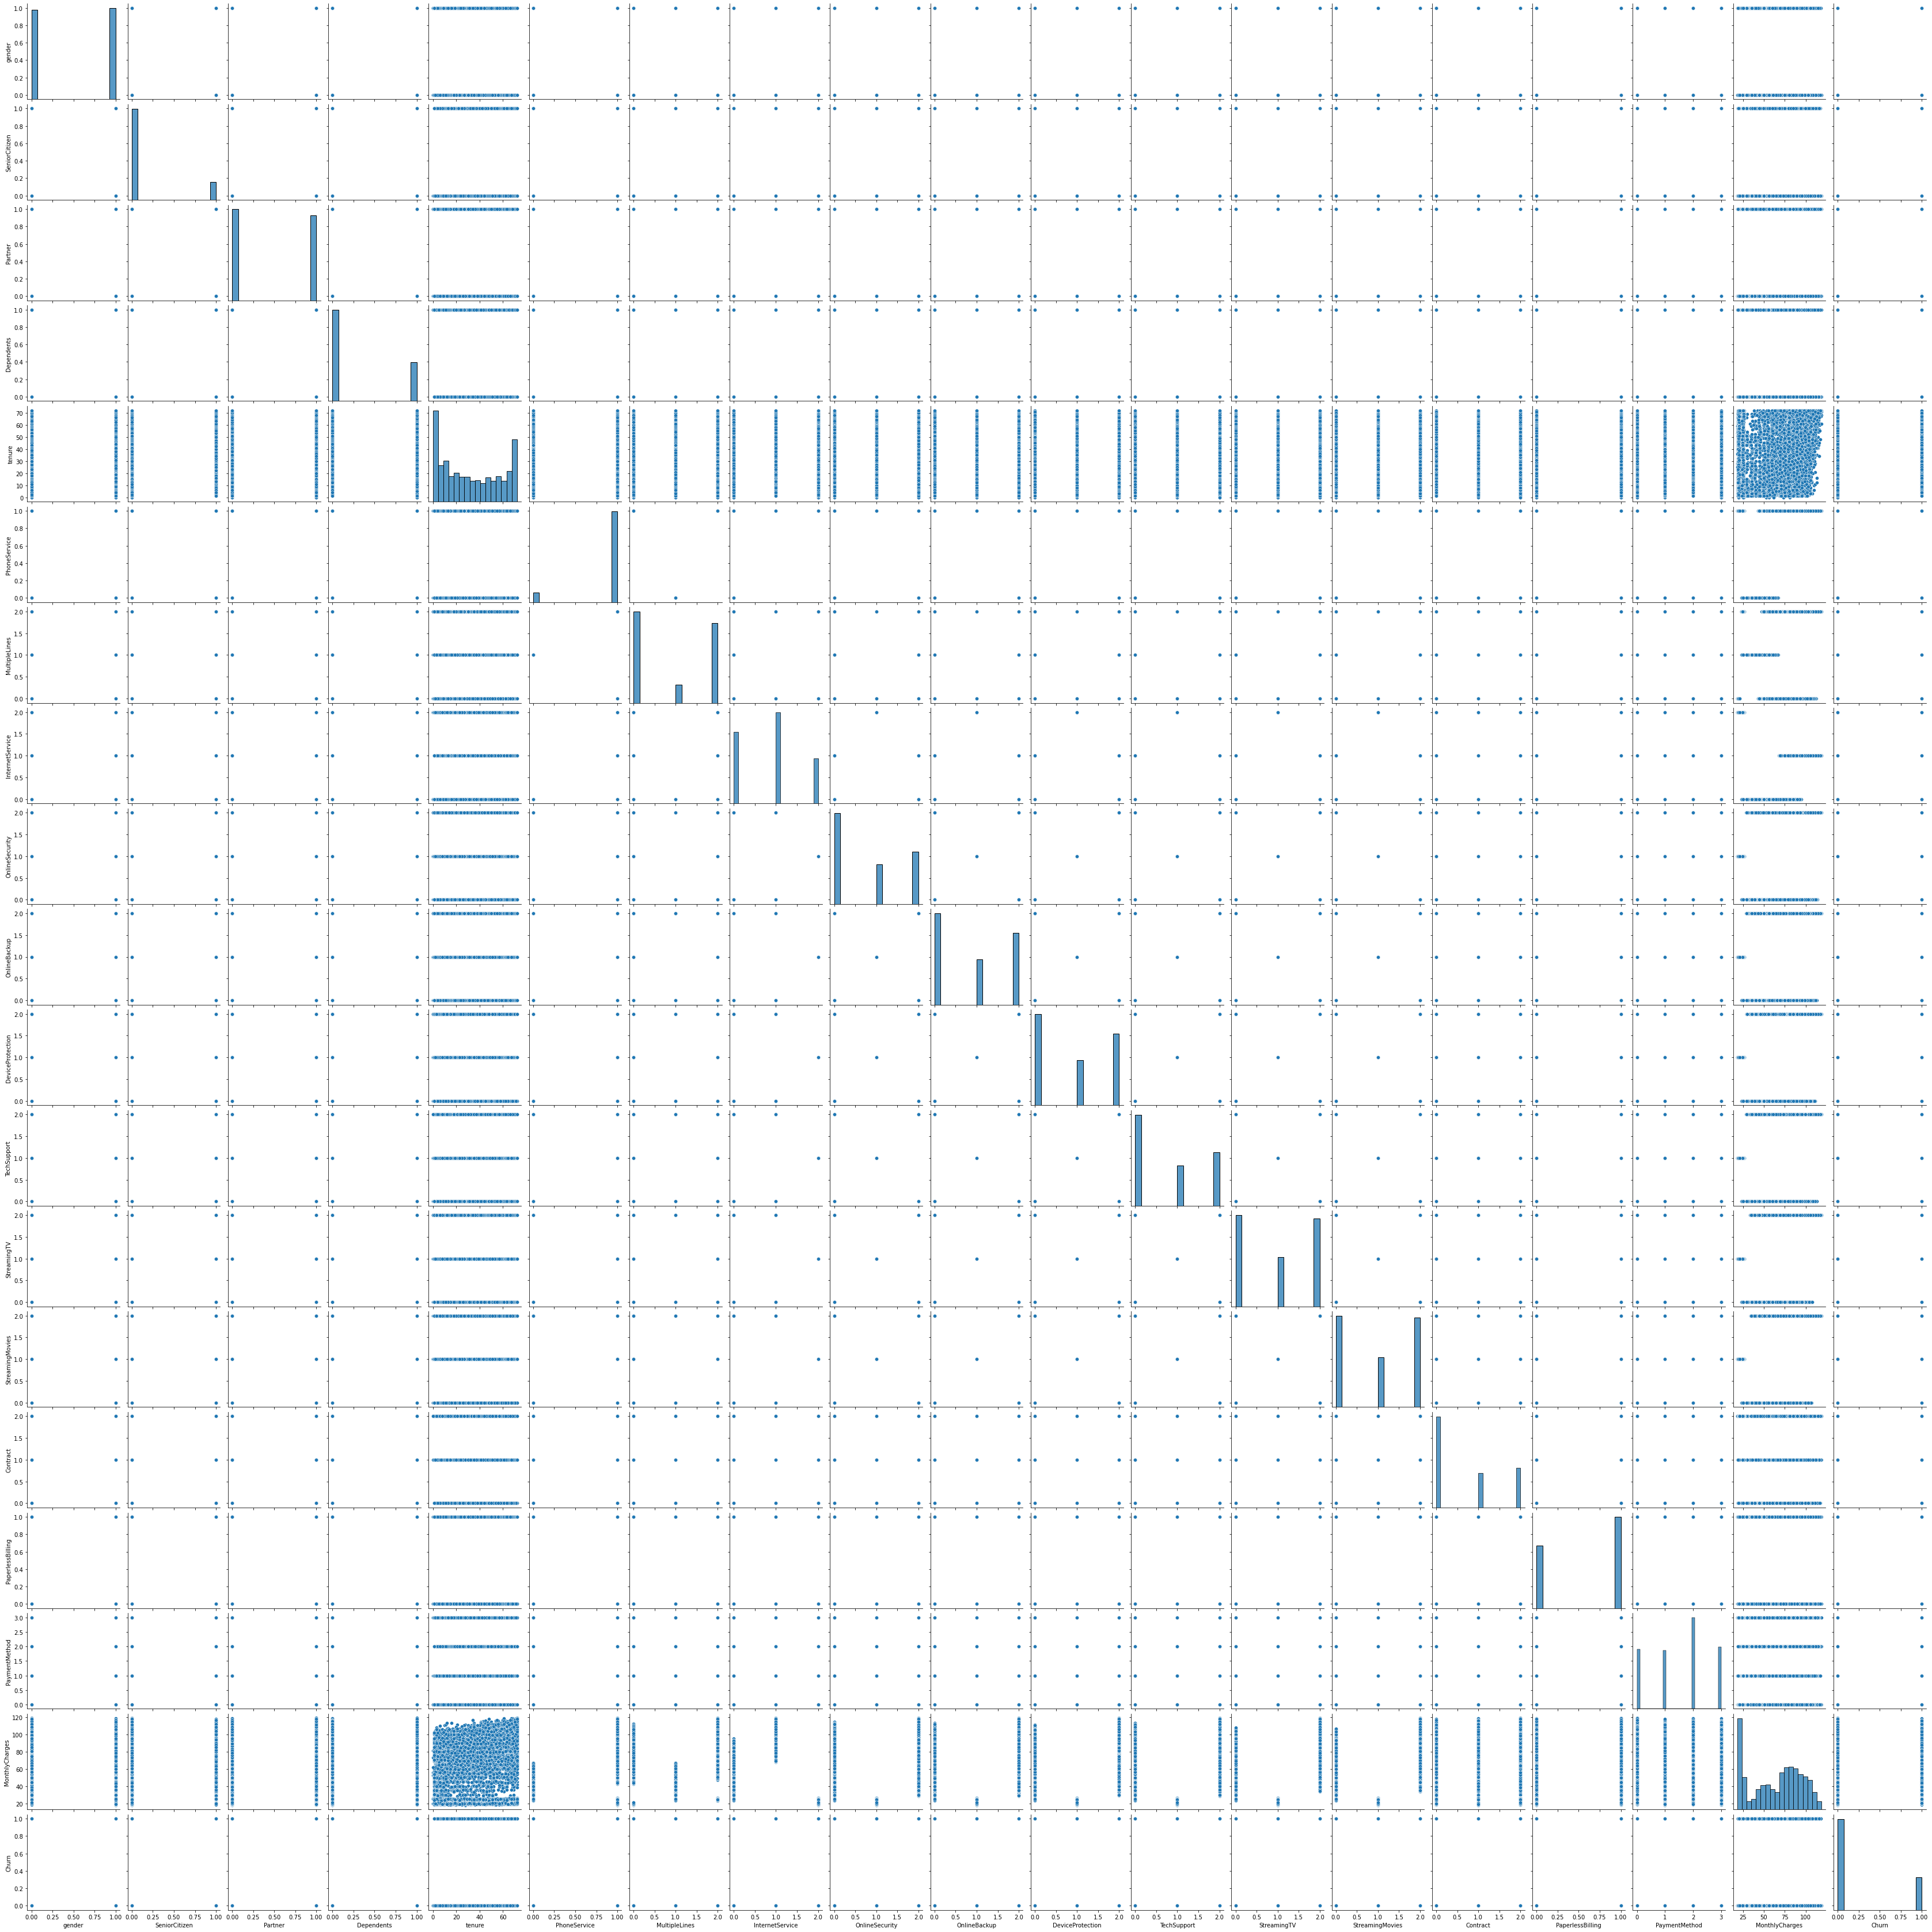

In [34]:
sns.pairplot(ds)

<AxesSubplot:>

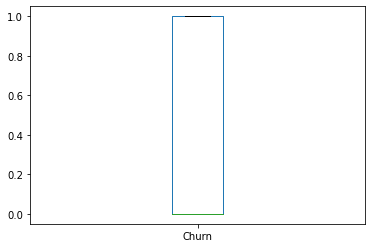

In [35]:
ds['Churn'].plot.box()

<AxesSubplot:>

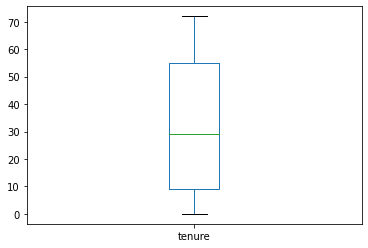

In [36]:
ds['tenure'].plot.box()

gender                 AxesSubplot(0.125,0.657941;0.0945122x0.222059)
SeniorCitizen       AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Partner             AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Dependents          AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
tenure              AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
PhoneService        AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
MultipleLines       AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
InternetService        AxesSubplot(0.125,0.391471;0.0945122x0.222059)
OnlineSecurity      AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
OnlineBackup        AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
DeviceProtection    AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
TechSupport         AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
StreamingTV         AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
StreamingMovies     AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
Contract            

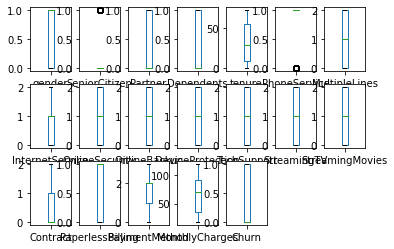

In [37]:
ds.plot(kind='box',subplots=True,layout=(3,7))

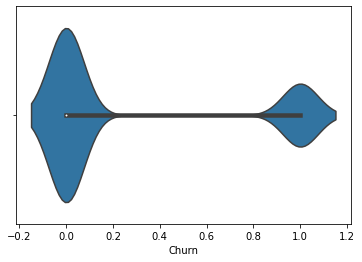

In [38]:
#univariate analysis
sns.violinplot(x='Churn',data=ds)
plt.show()

<AxesSubplot:xlabel='tenure'>

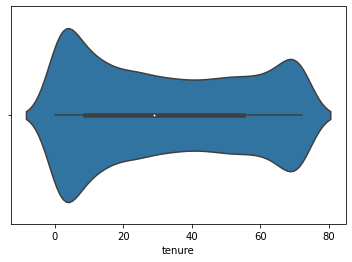

In [39]:
sns.violinplot(x='tenure',data=ds)

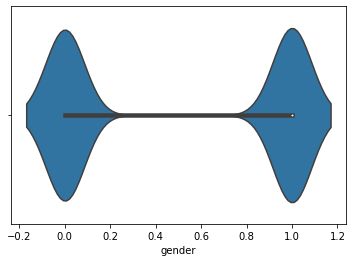

In [40]:
sns.violinplot(x='gender',data=ds)
plt.show()

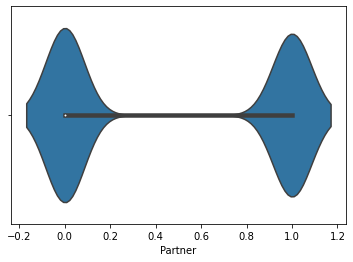

In [41]:
sns.violinplot(x='Partner',data=ds)
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

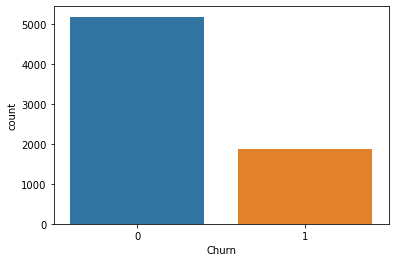

In [42]:
sns.countplot(ds['Churn'])

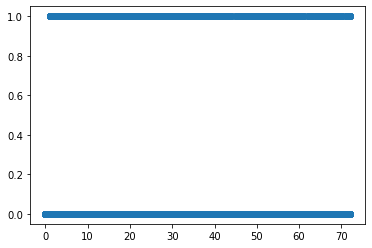

In [43]:
plt.scatter(ds['tenure'],ds['Churn'])
plt.show()

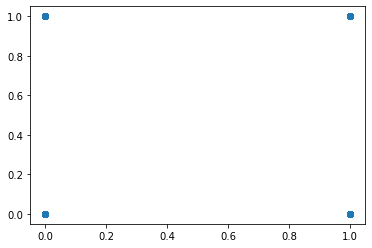

In [44]:
plt.scatter(ds['gender'],ds['Partner'])
plt.show()

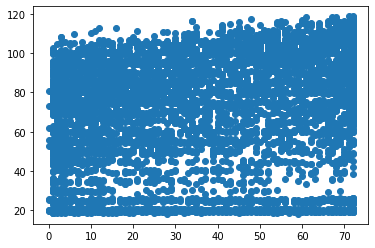

In [45]:
plt.scatter(ds['tenure'],ds['MonthlyCharges'])
plt.show()

In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [48]:
#lets divide the input and output datasets
x=ds.drop(columns=["Churn"])
y=ds[["Churn"]]

In [49]:
x.shape

(7043, 18)

In [50]:
y.shape

(7043, 1)

In [51]:
ds.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
Churn                 int32
dtype: object

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=237)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5493, 18)
(1550, 18)
(5493, 1)
(1550, 1)


In [55]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.7858064516129032
[[1032  119]
 [ 213  186]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1151
           1       0.61      0.47      0.53       399

    accuracy                           0.79      1550
   macro avg       0.72      0.68      0.69      1550
weighted avg       0.77      0.79      0.78      1550



In [56]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.7606451612903226
[[906 245]
 [126 273]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1151
           1       0.53      0.68      0.60       399

    accuracy                           0.76      1550
   macro avg       0.70      0.74      0.71      1550
weighted avg       0.79      0.76      0.77      1550



In [57]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7819354838709678
[[1074   77]
 [ 261  138]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1151
           1       0.64      0.35      0.45       399

    accuracy                           0.78      1550
   macro avg       0.72      0.64      0.66      1550
weighted avg       0.76      0.78      0.76      1550



In [60]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.7819354838709678
[[1074   77]
 [ 261  138]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1151
           1       0.64      0.35      0.45       399

    accuracy                           0.78      1550
   macro avg       0.72      0.64      0.66      1550
weighted avg       0.76      0.78      0.76      1550



In [61]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7980645161290323
[[1048  103]
 [ 210  189]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1151
           1       0.65      0.47      0.55       399

    accuracy                           0.80      1550
   macro avg       0.74      0.69      0.71      1550
weighted avg       0.79      0.80      0.79      1550



In [63]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7270967741935483
[[929 222]
 [201 198]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1151
           1       0.47      0.50      0.48       399

    accuracy                           0.73      1550
   macro avg       0.65      0.65      0.65      1550
weighted avg       0.73      0.73      0.73      1550



In [64]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.8012775  0.78992193 0.77430802 0.78764205 0.79332386]
0.7892946722369185


In [65]:
score=cross_val_score(dt,x,y,cv=5)
print(score)
print(score.mean())

[0.72817601 0.7246274  0.72036906 0.6953125  0.72798295]
0.7192935834569972


In [66]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.80979418 0.80624556 0.79843861 0.8046875  0.80610795]
0.8050547615975224


In [67]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.79701916 0.78850248 0.77217885 0.78977273 0.79545455]
0.7885855539067037


In [68]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.75940383 0.76295245 0.74520937 0.75710227 0.75213068]
0.7553597207884379


In [69]:
joblib.dump(lg,"lgmodel.obj")

['lgmodel.obj']